# DSC 690 Winter 2020 Health Insurance (Multiple Linear Regression)

# Importing the data and checking the head

In [2]:
#Importing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing the dataset through pandas dataframe
data = pd.read_csv("C:\\Users\\uru49\\Downloads\\insurance.csv")

#Checking the first five rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Genearating the dummy variables and taking care of dummy variable trap
df = pd.get_dummies(data, columns = ["sex", "smoker", "region"], drop_first = True)

#Checking the first five rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Extracting variables into the x and y

In [4]:
# Extracting independent variables into X
# Extracting the dependent variable into Y

X = df.iloc[:, [0,1,2,4,5,6,7]].values
y = df.iloc[:, 3].values

# Splitting data into the trainning and testing sets

In [6]:
# Splitting the dataset into the Training set and Test set
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Checking the shape of the trainnig and testing sets

In [7]:
#Checking the shape of the training set
X_train.shape

(1070, 7)

In [8]:
#Checking the shape of test set
X_test.shape

(268, 7)

# Fitting Multiple Linear Regression on the trainning set

In [10]:
#Setting up Multiple Linear Regression to the Training set
import sklearn
from sklearn.linear_model import LinearRegression
 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Extracting predictions and checking R squared values

In [11]:
# Extracting the predictions
y_pred = regressor.predict(X_test)

# Checking r square value
import sklearn
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.7984171871612084

# Displaying the scatterplot 

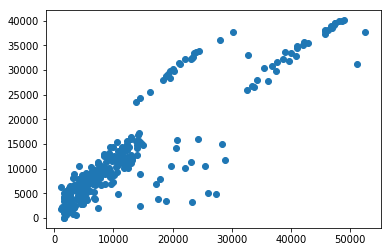

In [12]:
plt.scatter(y_test,y_pred)

# Predictions from the dataframe

In [13]:
#Making predictions from the dataframe function
df_ypred = pd.DataFrame(y_pred, columns = ["Y-PREDICTIONS"])
df_ytest = pd.DataFrame(y_test, columns = ["Y-TEST"])

# Adding the two dataframes together and viewing the test set and predictions side by side
df2 = pd.concat([df_ytest, df_ypred], axis = 1)
df2.head(10)

,Y-TEST,Y-PREDICTIONS
0,9724.53000,11540.278849
1,8547.69130,9496.444867
2,45702.02235,38166.180831
3,12950.07120,16262.311938
4,9644.25250,6963.440960
5,4500.33925,3598.938095
6,2198.18985,1182.560061
7,11436.73815,14339.361658
8,7537.16390,8976.886331
9,5425.02335,7469.715971


# Importing stats library of OLS

In [14]:
#Performing some backward elimination
import statsmodels.formula.api as sm
X_train = np.append(arr = np.ones((1070,1)).astype(int), values = X_train, axis = 1)
X_opt  = X_train[:, [0, 1, 2, 3, 4, 5, 6,7]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     424.1
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          2.31e-302
Time:                        15:34:39   Log-Likelihood:                -10852.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1062   BIC:                         2.176e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.215e+04   1104.046    -11.009      0.0

# OLS First Time

In [15]:
#Removing features with the highest values
X_opt  = X_train[:, [0, 1, 2, 3, 5, 6, 7]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     495.3
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          9.97e-304
Time:                        15:37:36   Log-Likelihood:                -10852.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1063   BIC:                         2.175e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.216e+04   1092.213    -11.132      0.0

# OLS Second Time

In [16]:
#Removing the X5 feature, since has the highest value
X_opt  = X_train[:, [0, 1, 2, 3, 5, 7]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     594.8
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          4.05e-305
Time:                        15:39:43   Log-Likelihood:                -10852.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1064   BIC:                         2.175e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04   1070.024    -11.305      0.0

# OLS P Level removal

In [17]:
#Removing P levels that are below 0.05
X_opt  = X_train[:, [0, 1, 2, 3, 5]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     742.8
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          3.00e-306
Time:                        15:41:52   Log-Likelihood:                -10853.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1065   BIC:                         2.174e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.191e+04   1059.711    -11.239      0.0

# OLS coefficients and predictions

In [18]:
# Creating a rows of ones for the coefficient
X_test = np.append(arr = np.ones((268, 1)).astype(int), values = X_test, axis = 1)

# Making predictions using the test set
y_predicted = regressor_OLS.predict(X_test[:,[0, 1, 2, 3, 5]])

# Plotting scatterplot of correlations

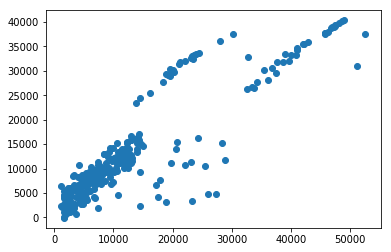

In [19]:
#Plotting the correlations between y test and y pred
plt.scatter(y_test,y_predicted)

# Plotting with seaborn

C:\Users\uru49\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


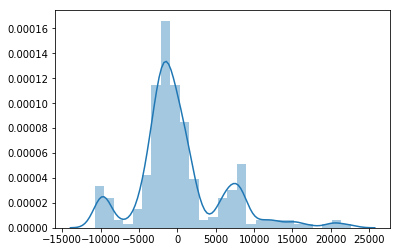

In [21]:
#Plotting the residuals of y test and y predicted
import seaborn as sns
sns.distplot(y_test - y_predicted)

# Linear Regression meterics

In [22]:
#Evaluating meterics for linear regression
import sklearn
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_predicted))
print(metrics.mean_squared_error(y_test, y_predicted))
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

3941.069397763106
32171708.572455704
5672.010981341247


In [23]:
#Making a dataframe with the predictions from this model
df_ypred = pd.DataFrame(y_predicted, columns = ["Y-PREDICTIONS"])

In [24]:
# Displaying the first five rows of the prediction dataframe
df_ypred.head()

,Y-PREDICTIONS
0,11461.217784
1,9920.246705
2,37782.650918
3,15948.078800
4,6880.179534


In [25]:
#Making the dataframe for the y-test dataset
df_ytest = pd.DataFrame(y_test, columns = ["Y-TEST"])

In [26]:
#Displaying the first five rows of the y-test datframe
df_ytest.head()

,Y-TEST
0,9724.53000
1,8547.69130
2,45702.02235
3,12950.07120
4,9644.25250


In [27]:
#Concatinating the y-test and y-prediction dataframes into one
df2 = pd.concat([df_ytest, df_ypred], axis = 1)
df2.head(10)

,Y-TEST,Y-PREDICTIONS
0,9724.53000,11461.217784
1,8547.69130,9920.246705
2,45702.02235,37782.650918
3,12950.07120,15948.078800
4,9644.25250,6880.179534
5,4500.33925,3611.722985
6,2198.18985,1116.037612
7,11436.73815,14050.366355
8,7537.16390,8755.914946
9,5425.02335,7245.244001


# Scikit learn model with OLS regression features

In [28]:
#Building a model based on the features from OLS regression
X = df.iloc[:, [0, 1, 2, 4]].values
y = df.iloc[:, 3].values

#Spitting data with cross validation
import sklearn
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

C:\Users\uru49\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
#Fitting Multiple Linear Regression to the Training set
import sklearn
from sklearn.linear_model import LinearRegression
 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
#Extracting the predictions from X_test
y_pred = regressor.predict(X_test)

#Displaying the R squared value score
import sklearn
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.1701618388818984